In [1]:
pip install lazypredict

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

**DataSet**

In [3]:
Heart_data=pd.read_csv("/content/heart.csv")
Heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


**Data Cleaning**

In [4]:
Heart_data.shape

(1025, 14)

In [5]:
Heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
Heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
Heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [8]:
Heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
Heart_data.sex.unique()

array([1, 0])

**EDA**

In [11]:
Heart_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.27,0.22,0.12,-0.13,-0.39,0.09,0.21,-0.17,0.27,0.07,-0.23
sex,-0.10,1.00,-0.04,-0.08,-0.20,0.03,-0.06,-0.05,0.14,0.08,-0.03,0.11,0.20,-0.28
cp,-0.07,-0.04,1.00,0.04,-0.08,0.08,0.04,0.31,-0.40,-0.17,0.13,-0.18,-0.16,0.43
trestbps,0.27,-0.08,0.04,1.00,0.13,0.18,-0.12,-0.04,0.06,0.19,-0.12,0.10,0.06,-0.14
chol,0.22,-0.20,-0.08,0.13,1.00,0.03,-0.15,-0.02,0.07,0.06,-0.01,0.07,0.10,-0.10
fbs,0.12,0.03,0.08,0.18,0.03,1.00,-0.10,-0.01,0.05,0.01,-0.06,0.14,-0.04,-0.04
restecg,-0.13,-0.06,0.04,-0.12,-0.15,-0.10,1.00,0.05,-0.07,-0.05,0.09,-0.08,-0.02,0.13
thalach,-0.39,-0.05,0.31,-0.04,-0.02,-0.01,0.05,1.00,-0.38,-0.35,0.40,-0.21,-0.10,0.42
exang,0.09,0.14,-0.40,0.06,0.07,0.05,-0.07,-0.38,1.00,0.31,-0.27,0.11,0.20,-0.44
oldpeak,0.21,0.08,-0.17,0.19,0.06,0.01,-0.05,-0.35,0.31,1.00,-0.58,0.22,0.20,-0.44


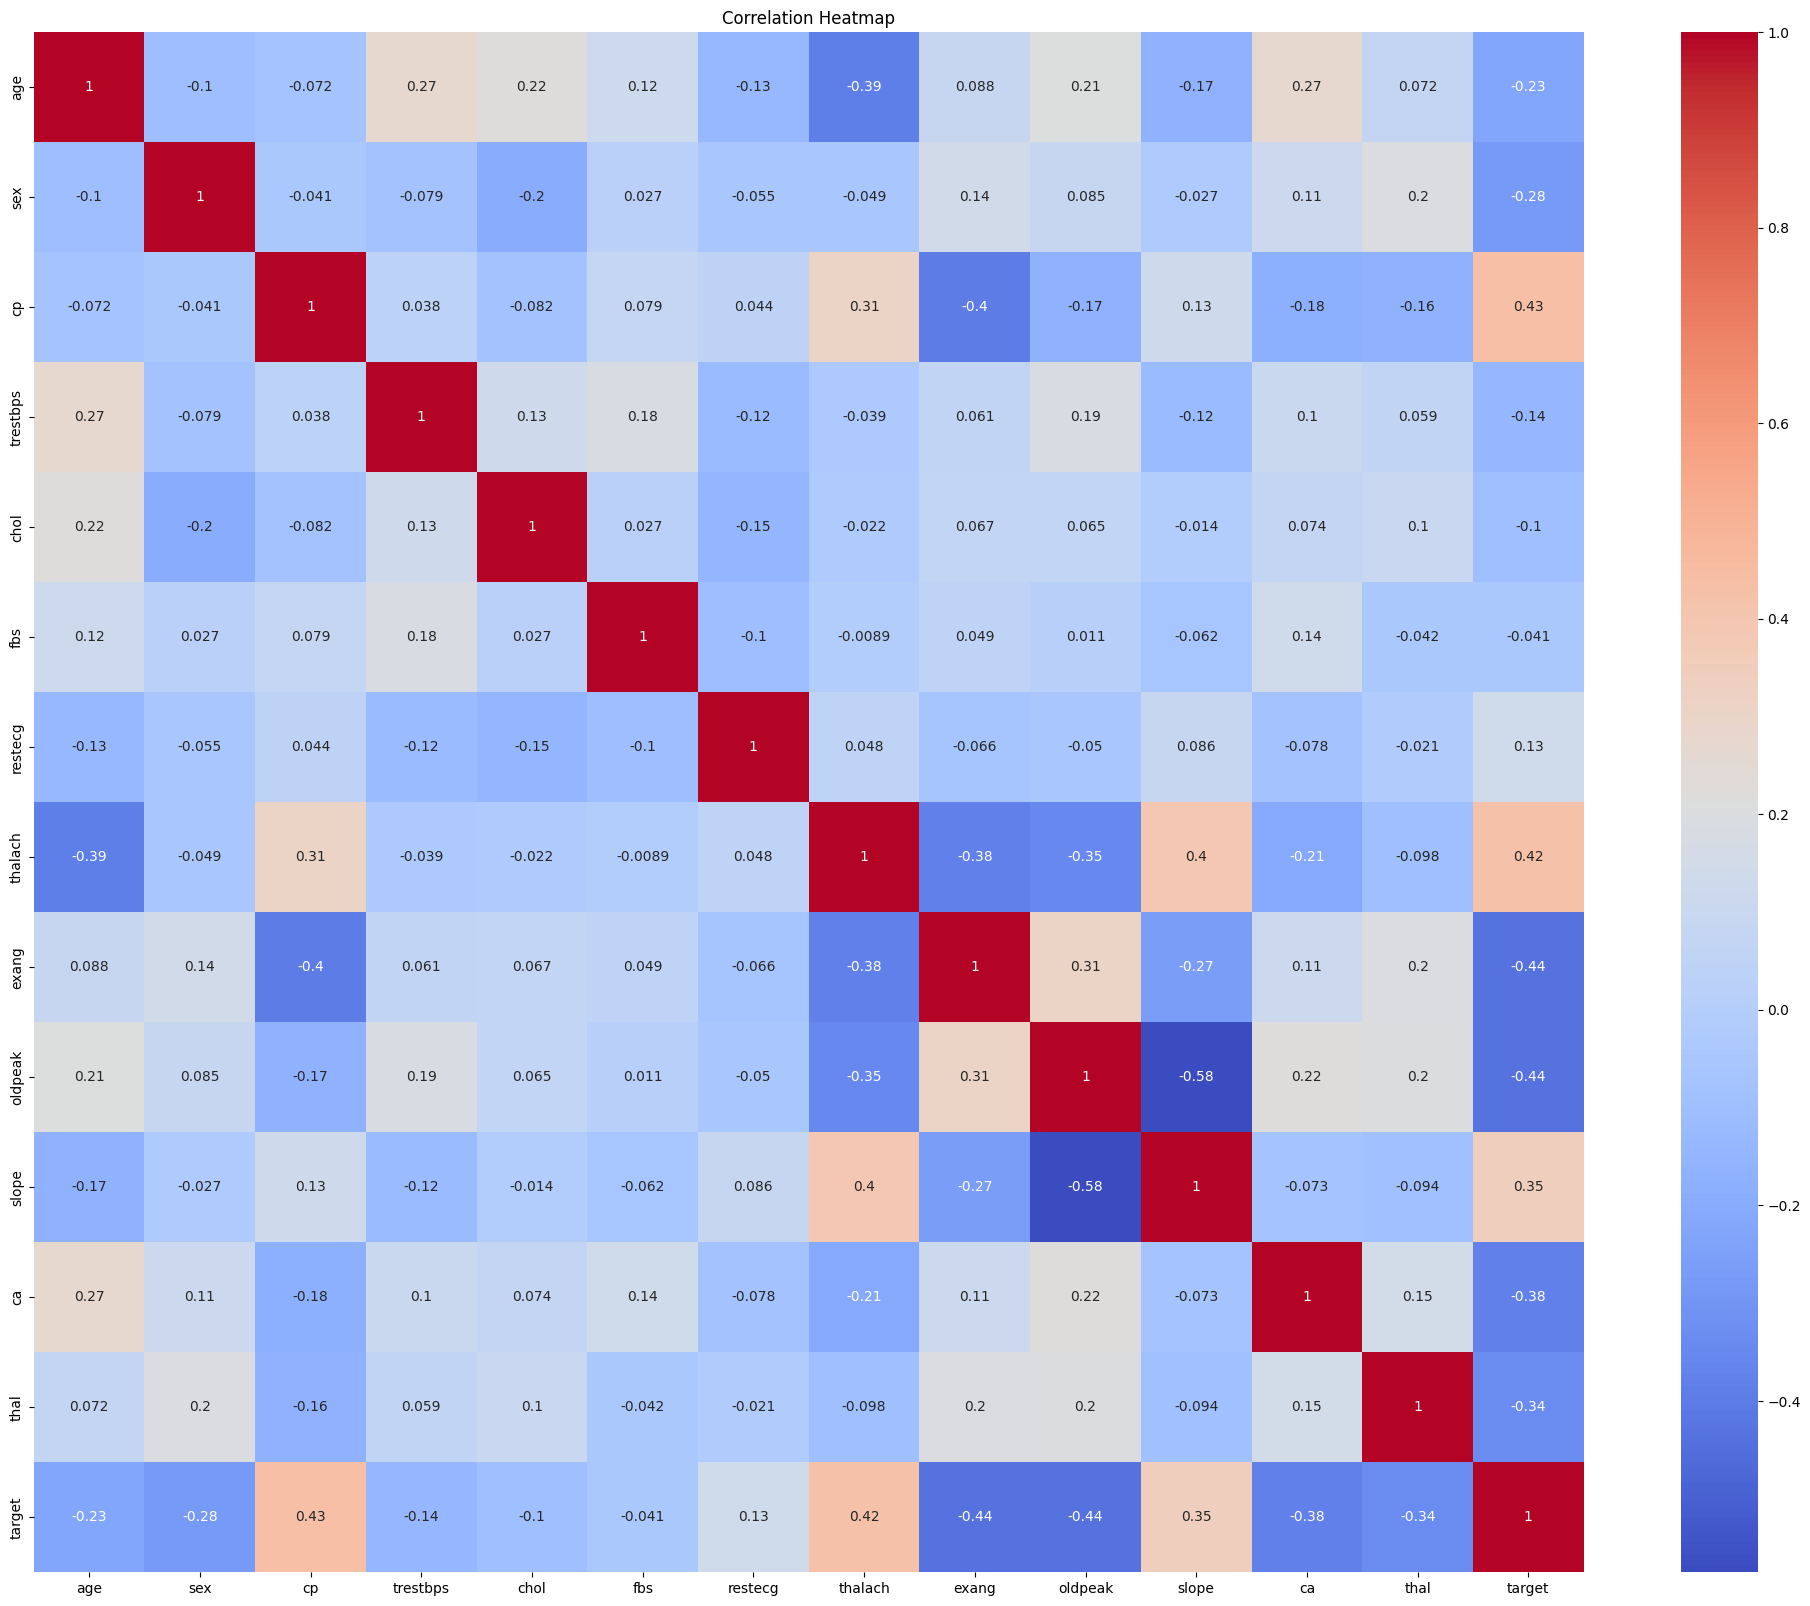

In [14]:
plt.figure(figsize=(25,20))
sns.heatmap(Heart_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

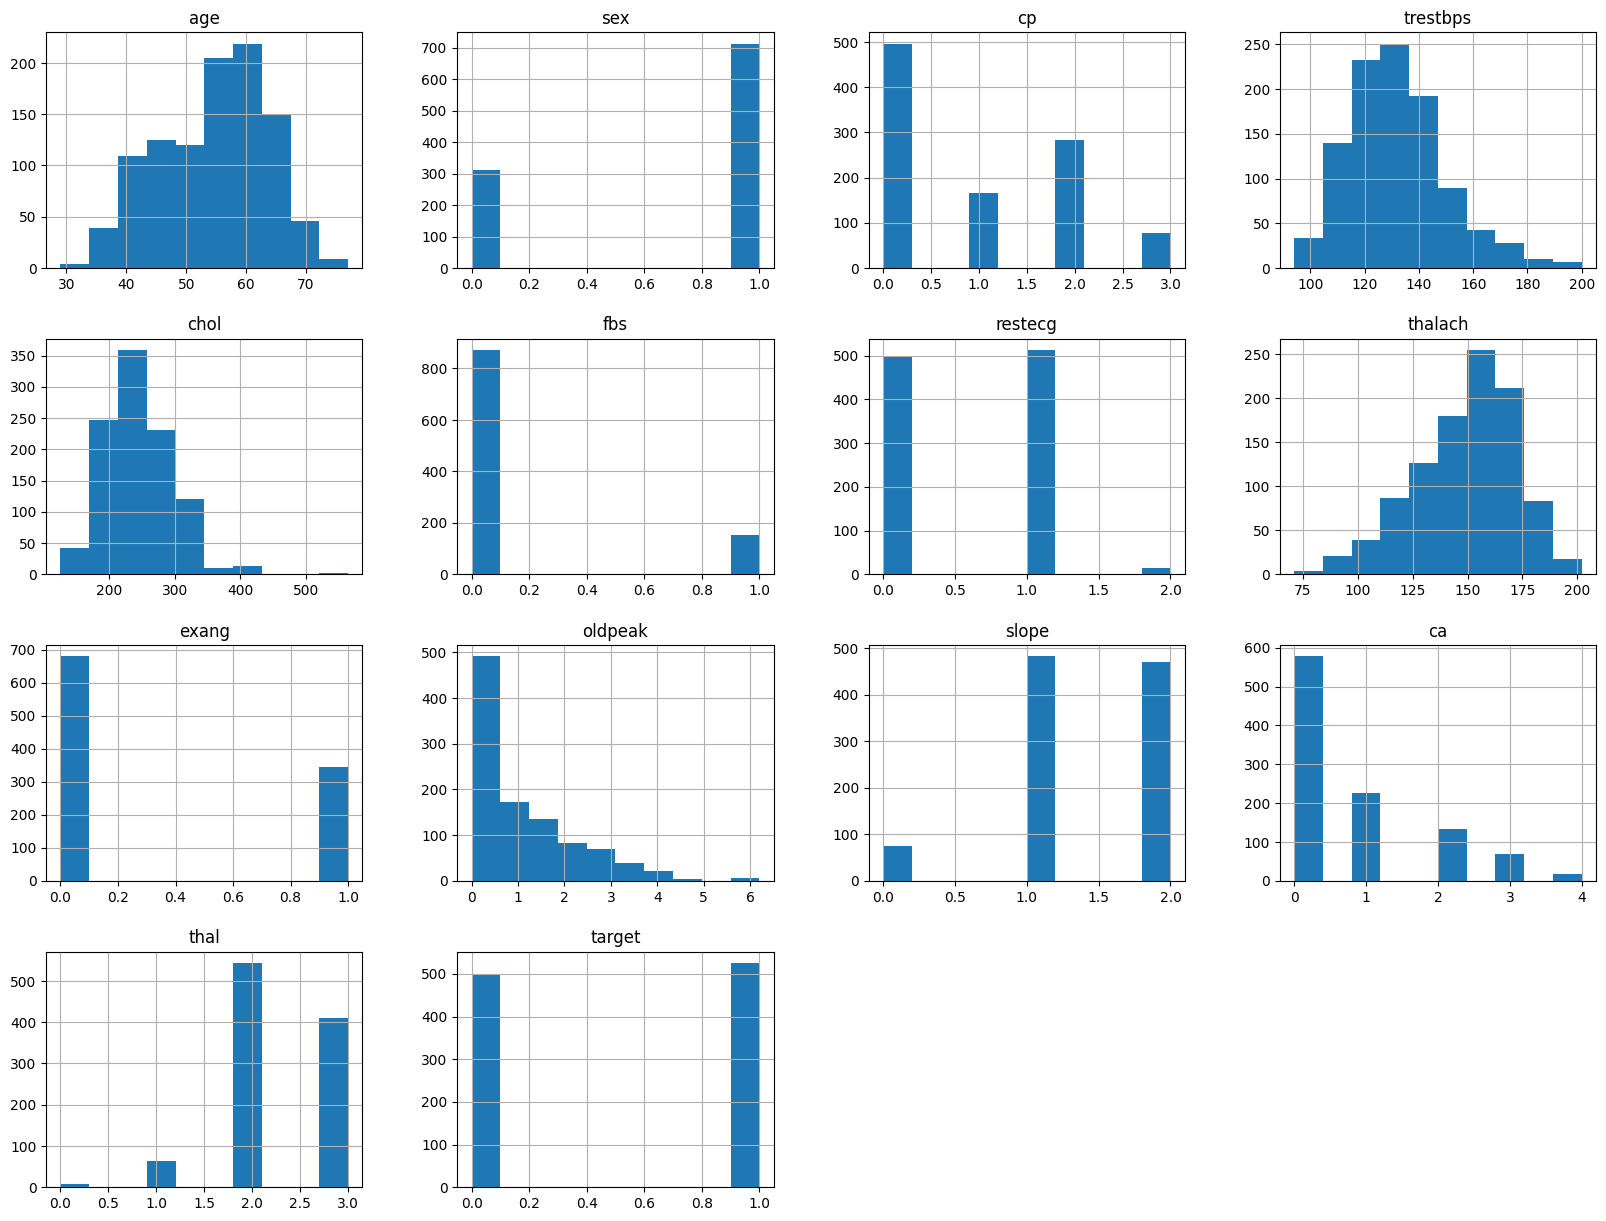

In [15]:
Heart_data.hist(figsize=(20,15));

In [17]:
x=Heart_data.drop('target',axis=1)
y=Heart_data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [21]:
from sklearn.ensemble import AdaBoostClassifier
model2=AdaBoostClassifier().fit(x_train,y_train)
y_pred2=model2.predict(x_test)
accuracy_score(y_test,y_pred2)

0.9365853658536586

In [23]:
confusion=confusion_matrix(y_test,y_pred2)
confusion

array([[105,   7],
       [  6,  87]])

In [24]:
report = classification_report(y_test, y_pred2)

In [25]:
print(report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       112
           1       0.93      0.94      0.93        93

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



In [30]:
from sklearn.ensemble import AdaBoostClassifier
model2=AdaBoostClassifier(learning_rate=0.9).fit(x_train,y_train)
y_pred2=model2.predict(x_test)
accuracy_score(y_test,y_pred2)
cm=confusion_matrix(y_test,y_pred2)

In [31]:
cm_df=pd.DataFrame(cm,columns=['predicted 0','predicted 1'])
cm_df.rename(index={0:'Actual_0', 1:'Actual_1'}, inplace=True)
cm_df

,predicted 0,predicted 1
Actual_0,103,9
Actual_1,8,85


**Breastcancer_data**

In [32]:
BCD=pd.read_csv("/content/Breast_cancer_data.csv")

In [33]:
BCD.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.00,0.12,0
1,20.57,17.77,132.90,1326.00,0.08,0
2,19.69,21.25,130.00,1203.00,0.11,0
3,11.42,20.38,77.58,386.10,0.14,0
4,20.29,14.34,135.10,1297.00,0.10,0


**Data Cleaning**

In [34]:
BCD.shape

(569, 6)

In [35]:
BCD.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [36]:
BCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [37]:
BCD.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.63
std,3.52,4.30,24.30,351.91,0.01,0.48
min,6.98,9.71,43.79,143.50,0.05,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.00
50%,13.37,18.84,86.24,551.10,0.10,1.00
75%,15.78,21.80,104.10,782.70,0.11,1.00
max,28.11,39.28,188.50,2501.00,0.16,1.00


**EDA**

In [38]:
BCD.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.00,0.32,1.00,0.99,0.17,-0.73
mean_texture,0.32,1.00,0.33,0.32,-0.02,-0.42
mean_perimeter,1.00,0.33,1.00,0.99,0.21,-0.74
mean_area,0.99,0.32,0.99,1.00,0.18,-0.71
mean_smoothness,0.17,-0.02,0.21,0.18,1.00,-0.36
diagnosis,-0.73,-0.42,-0.74,-0.71,-0.36,1.00


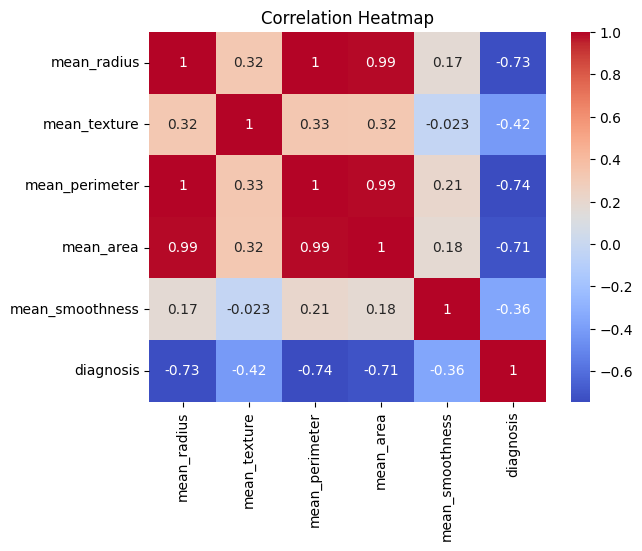

In [39]:
sns.heatmap(BCD.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

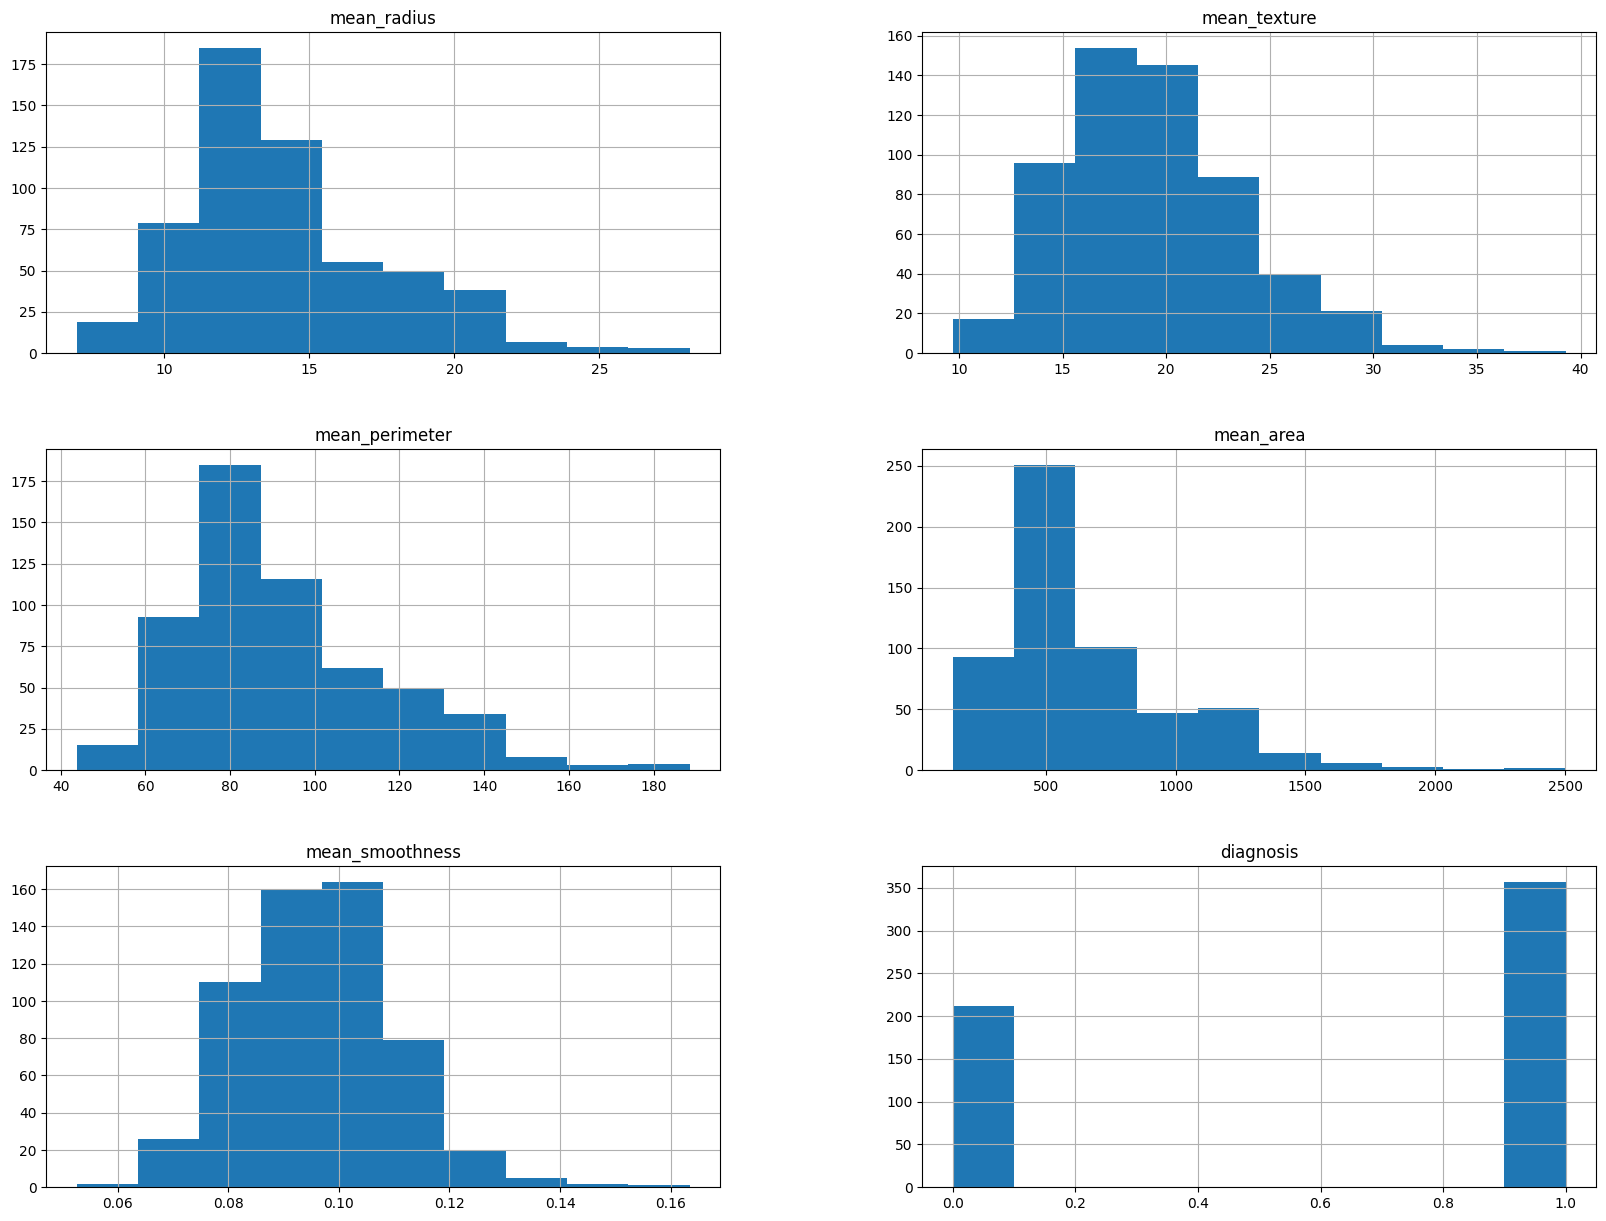

In [41]:
BCD.hist(figsize=(20,15))
plt.show()

In [51]:
x1=BCD.drop('diagnosis',axis=1)
y1=BCD['diagnosis']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.20)

In [52]:
from sklearn.ensemble import AdaBoostClassifier
model2=AdaBoostClassifier().fit(x_train1,y_train1)
y_pred2=model2.predict(x_test1)
acc=accuracy_score(y_test1,y_pred2)

In [53]:
acc

0.9473684210526315

In [55]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier().fit(x_train1,y_train1)
y_pred1=model1.predict(x_test1)
acc=accuracy_score(y_test1,y_pred1)
acc

0.9298245614035088

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
model7=GradientBoostingClassifier().fit(x_train1,y_train1)
y_pred7=model7.predict(x_test1)
acc=accuracy_score(y_test1,y_pred7)
acc

0.9210526315789473

In [58]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier().fit(x_train1,y_train1)
y_pred=model.predict(x_test1)
acc=accuracy_score(y_test1,y_pred)
acc

0.8859649122807017